<a href="https://colab.research.google.com/github/anuradha-datascience/machine-learning/blob/main/3.HandsOnIntro-Supervised%20Regression/adjusted_r2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [780]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import random

In [781]:
df=pd.read_csv('advert_budget.csv')
df.head()

,TV,Radio,Social Media,Sales
0,16.0,6.566231,2.907983,54.732757
1,13.0,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181


In [782]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Sales         4566 non-null   float64
dtypes: float64(4)
memory usage: 143.0 KB


In [783]:
# df=df.drop(columns=['Influencer'])

In [784]:
# df = df.fillna(df.mean())
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4546 entries, 0 to 4571
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4546 non-null   float64
 1   Radio         4546 non-null   float64
 2   Social Media  4546 non-null   float64
 3   Sales         4546 non-null   float64
dtypes: float64(4)
memory usage: 177.6 KB


In [785]:
df.head()

,TV,Radio,Social Media,Sales
0,16.0,6.566231,2.907983,54.732757
1,13.0,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181


In [786]:
df=subset_df = df.iloc[:200, :]

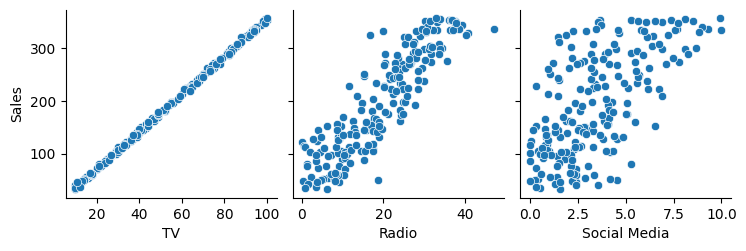

In [787]:
# Pair plot for visualizing pairwise relationships
sns.pairplot(df, x_vars=['TV', 'Radio', 'Social Media'], y_vars='Sales')
plt.show()

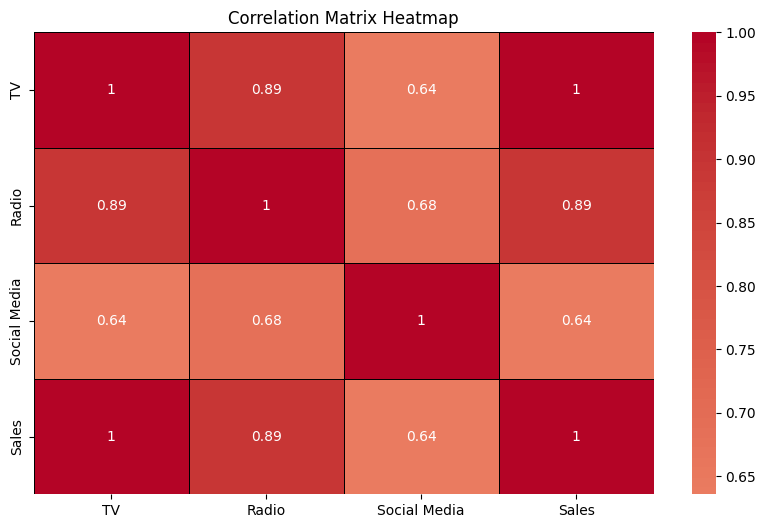

In [788]:
# Calculate correlation coefficients
correlations = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0, linewidths=0.5, linecolor='black')

# Add a title to the heatmap for clarity
plt.title('Correlation Matrix Heatmap')
plt.show()

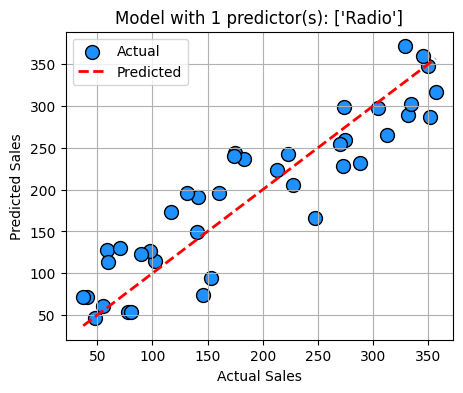

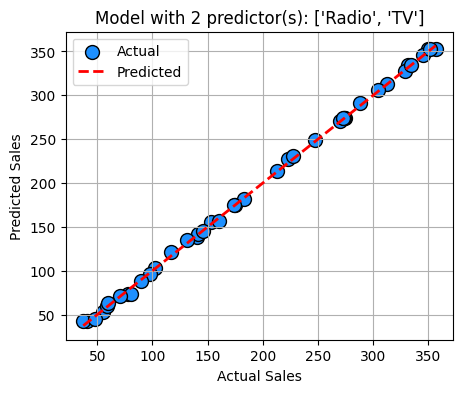

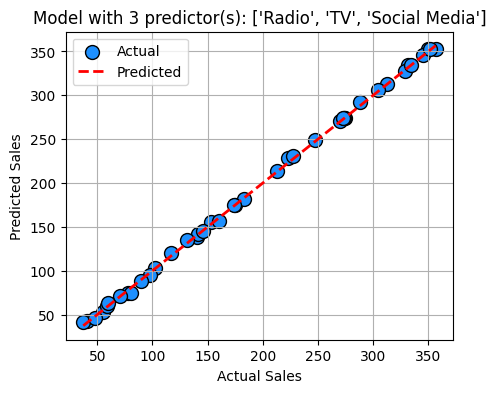

   Predictors       R^2  Adjusted R^2
0           1  0.828216      0.823696
1           2  0.999315      0.999278
2           3  0.999324      0.999268


In [789]:
# Assuming df contains your data with predictors and target variable
# Let's use the first 3 columns as predictors for demonstration
predictors = ['Radio','TV','Social Media']
r2_values = []
adj_r2_values = []

# Loop through different combinations of predictors
for i in range(1, len(predictors) + 1):
    # Select predictors for this iteration
    selected_predictors = predictors[:i]

    # Split the data into train and test sets
    X = df[selected_predictors]
    y = df['Sales']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate R^2
    r2 = r2_score(y_test, y_pred)
    r2_values.append(r2)

    # Calculate adjusted R^2
    n = len(X_test)
    p = len(selected_predictors)
    adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
    adj_r2_values.append(adj_r2)


    # Plot y_test vs y_pred with the regression line and residuals
    plt.figure(figsize=(5, 4))
    plt.scatter(y_test, y_pred, label='Actual', color='dodgerblue', edgecolor='k', s=100)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', lw=2, color='red', label='Predicted')

    # # Add residual lines
    # for i in range(len(y_test)):
    #     plt.plot([y_test.iloc[i], y_test.iloc[i]], [y_test.iloc[i], y_pred[i]], '-', color='grey')

    plt.xlabel('Actual Sales')
    plt.ylabel('Predicted Sales')
    plt.title(f'Model with {len(selected_predictors)} predictor(s): {selected_predictors}')
    plt.legend()
    plt.grid(True)
    plt.show()

# # Create a DataFrame to store R^2 and adjusted R^2 values
# results_df = pd.DataFrame({
#     'Predictors': range(1, len(predictors) + 1),
#     'R^2': r2_values,
#     'Adjusted R^2': adj_r2_values
# })

# # Print the results table
# print(results_df)

# Create a DataFrame to store R^2 and adjusted R^2 values
results_df = pd.DataFrame({'Predictors': range(1, len(predictors) + 1),
                           'R^2': r2_values,
                           'Adjusted R^2': adj_r2_values})

# Print the results table
print(results_df)

